In [1]:
import numpy as np 
import matplotlib.pyplot as plot
import pandas as pd 
import yfinance as yf


In [2]:
!pip install yfinance



In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf


In [4]:
start='2020-01-01'
end='2025-01-01'
stock='TSLA'
data=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...
1253,2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
1254,2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
1255,2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800


In [7]:
ma_100_days= data.Close.rolling(100).mean()

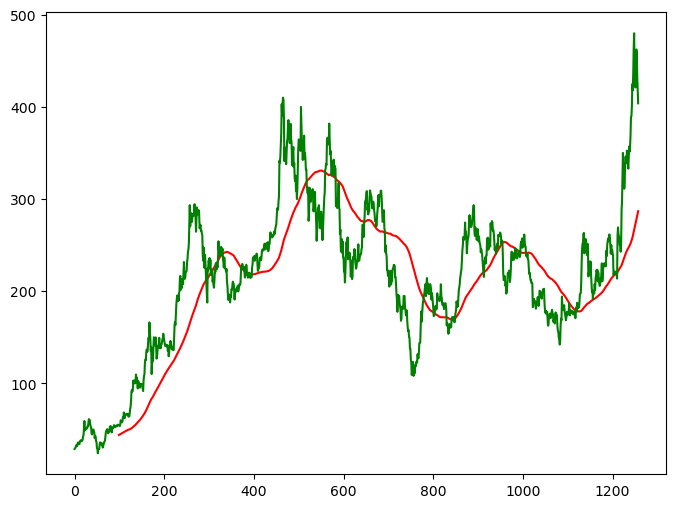

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')

In [9]:
ma_200_days = data.Close.rolling(200).mean()

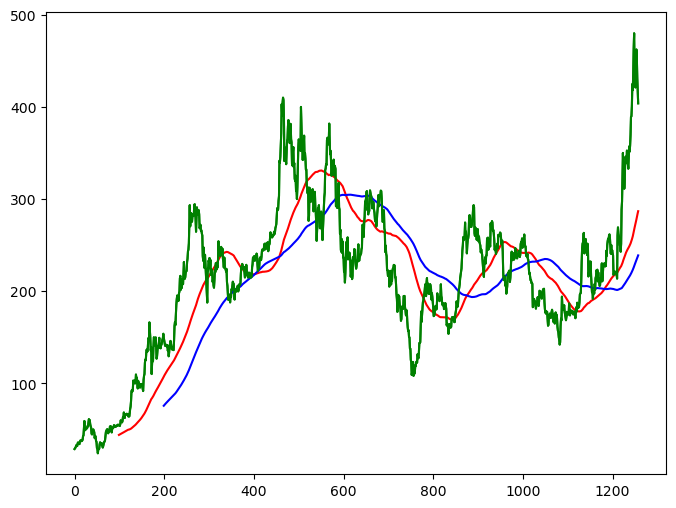

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)


In [12]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])

In [13]:
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [14]:
data_train.shape[0]

1006

In [15]:
data_test.shape[0]

252

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale= scaler.fit_transform(data_train)

In [37]:
x=[]
y=[]

for i in range (100,data_train_scale.shape[0]):
 x.append(data_train_scale[i-100:i])
 y.append(data_train_scale[i,0])

In [21]:
!pip install keras


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 17.1 MB/s eta 0:00:00


In [25]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 4.7/376.0 MB 23.7 MB/s eta 0:00:16
   - -------------------------------------- 9.4/376.0 MB 25.5 MB/s eta 0:00:15
   - -------------------------------------- 15.2/376.0 MB 24.5 MB/s eta 0:00:15
   - -------------------------------------- 16.5/376.0 MB 24.7 MB/s eta 0:00:15
   -- ------------------------------------- 22.3/376.0 MB 21.3 MB/s eta 0:00:17
   --- ------------------------------------ 28.8/376.0 MB 22.9 MB/s eta 0:00:16
   --- ------------------------------------ 37.0/376.0 MB 25.0 MB/s eta 0:00:14
   ---- ----------------------------------- 44.8/376.0 MB 26.7 MB/s eta 0:00:13
   ----- ---------------------------------- 52.2/376.0 MB 27.4 MB/s eta 0:00:12
   ----- ---------------------------------- 52.4/376.0 MB 27.6 MB/s eta 0:00:12
   ----- ---------------------------------- 55.1/376.0 MB 23.9 MB/s eta 0:00:14
   ------ --------------------------------- 60.8/37

In [39]:
x,y= np.array(x),np.array(y)

In [50]:
from keras.layers import Dense,Dropout,LSTM,Input
from keras.models import Sequential

In [58]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Model definition
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))  # Explicit input layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))

# ✅ FIXED: Output layer should match `y` shape
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# ✅ Ensure `y` is reshaped correctly
y = y.reshape(-1, 1)

# Train the model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 0.1449
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 0.0137
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0092
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - loss: 0.0090
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0078
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - loss: 0.0081
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - loss: 0.0076
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 0.0071
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - loss: 0.0056
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - loss: 0.0055
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - loss: 0.0050
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - loss: 0.0045
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - loss: 0.0055
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0042
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - 

In [60]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [62]:
pas_100_days = data_train.tail(100)

In [66]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [70]:
data_test_scale = scaler.fit_transform(data_test)

In [76]:
x=[]
y=[]

for i in range (100,data_test_scale.shape[0]):
 x.append(data_test_scale[i-100:i])
 y.append(data_test_scale[i,0])

x,y=np.array(x), np.array(y)
y = y.reshape(-1, 1)

In [78]:
y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step


In [80]:
y_predict

array([[0.34836888],
       [0.34567446],
       [0.34046322],
       [0.33334643],
       [0.3254571 ],
       [0.3175571 ],
       [0.31010908],
       [0.3034349 ],
       [0.29754472],
       [0.29228884],
       [0.28757775],
       [0.2833451 ],
       [0.2795369 ],
       [0.2760899 ],
       [0.27290475],
       [0.26992035],
       [0.26708502],
       [0.26409435],
       [0.26074868],
       [0.25702715],
       [0.25299358],
       [0.2487248 ],
       [0.2443333 ],
       [0.23994441],
       [0.23566364],
       [0.2315787 ],
       [0.22775458],
       [0.22422302],
       [0.22100617],
       [0.21810178],
       [0.21548632],
       [0.21313974],
       [0.211069  ],
       [0.20928413],
       [0.2077731 ],
       [0.2065161 ],
       [0.20549442],
       [0.20467584],
       [0.20403856],
       [0.20357071],
       [0.20326945],
       [0.20312782],
       [0.20313568],
       [0.20324203],
       [0.20337354],
       [0.20345236],
       [0.20342435],
       [0.203

In [86]:
scale= 1/scaler.scale_

In [88]:
y_predict = y_predict*scale

In [90]:
y = y*scale

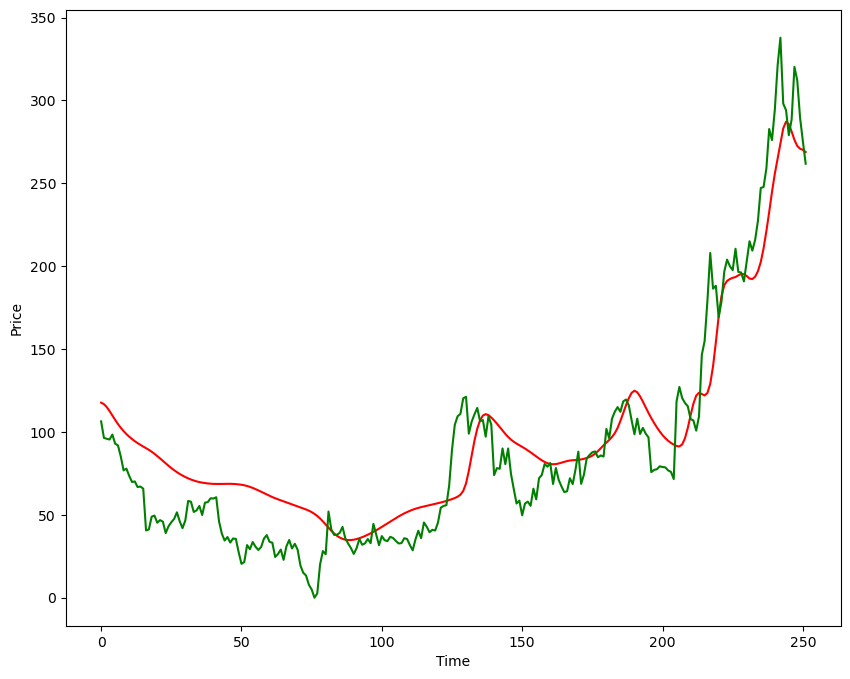

In [94]:
plt.figure(figsize=(10,8))
plt.plot(y_predict , 'r' , label = 'predicted price')
plt.plot(y,'g' , label = 'original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend
plt.show()

In [96]:
model.save('Stock predicction model.keras')